# **Admission Prediction Project**

-------------

## **Objective**

The goal of this project is to predict the chances of a student being admitted to a university based on various factors such as GRE score, TOEFL score, university rating, SOP strength, LOR strength, CGPA, and research experience. This type of prediction can help students understand their likelihood of admission and can assist universities in their selection processes.

## **Data Source**

You can access the dataset for bike prices using the following link: https://github.com/YBIFoundation/Dataset/blob/main/Admission%20Chance.csv

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Import Data**

In [5]:
# URL of the dataset (raw link)
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Admission%20Chance.csv"

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset to verify
print(df.head())

   Serial No  GRE Score  TOEFL Score  University Rating   SOP  LOR   CGPA  \
0          1        337          118                  4   4.5   4.5  9.65   
1          2        324          107                  4   4.0   4.5  8.87   
2          3        316          104                  3   3.0   3.5  8.00   
3          4        322          110                  3   3.5   2.5  8.67   
4          5        314          103                  2   2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


## **Describe Data**

In [ ]:
Serial No: Unique identifier for each student record.
GRE Score: Graduate Record Examination score.
TOEFL Score: Test of English as a Foreign Language score.
University Rating: Rating of the university (likely on a scale from 1 to 5).
SOP: Statement of Purpose strength (likely on a scale from 1 to 5).
LOR: Letter of Recommendation strength (likely on a scale from 1 to 5).
CGPA: Undergraduate Grade Point Average.
Research: Whether the student has research experience (0 for no, 1 for yes).
Chance of Admit: Probability of admission (likely a value between 0 and 1).

## **Data Visualization**

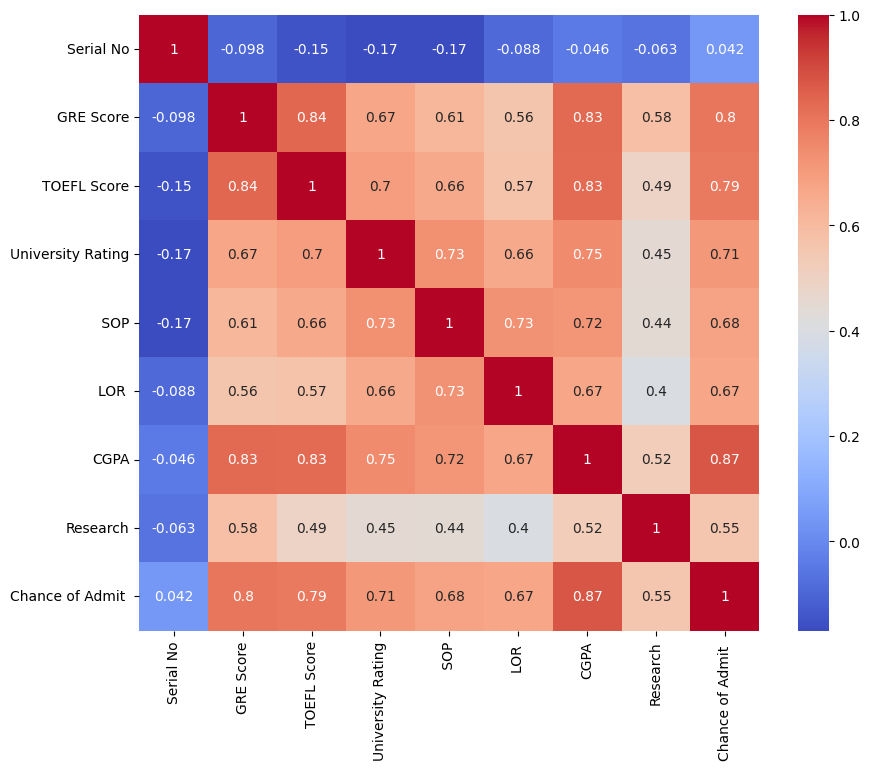

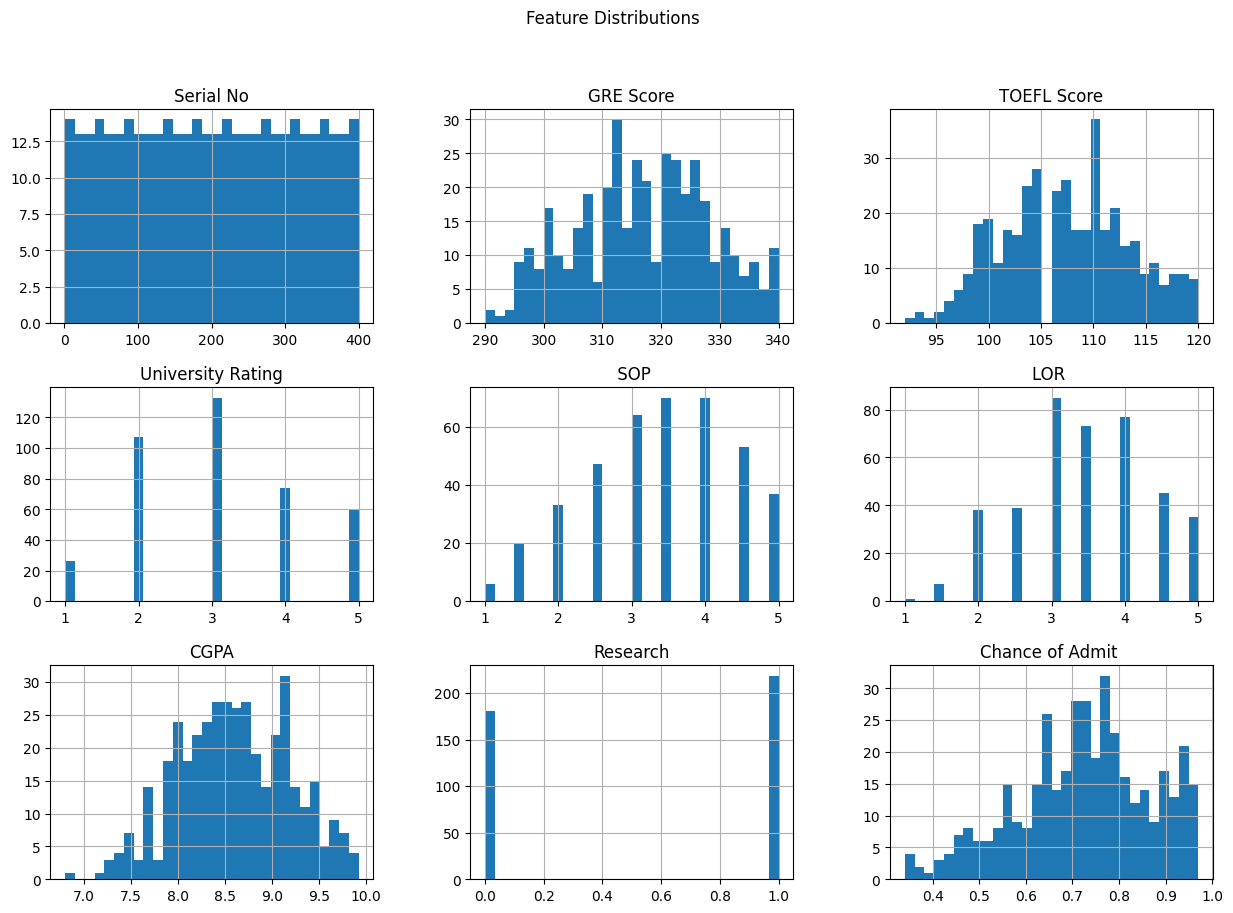

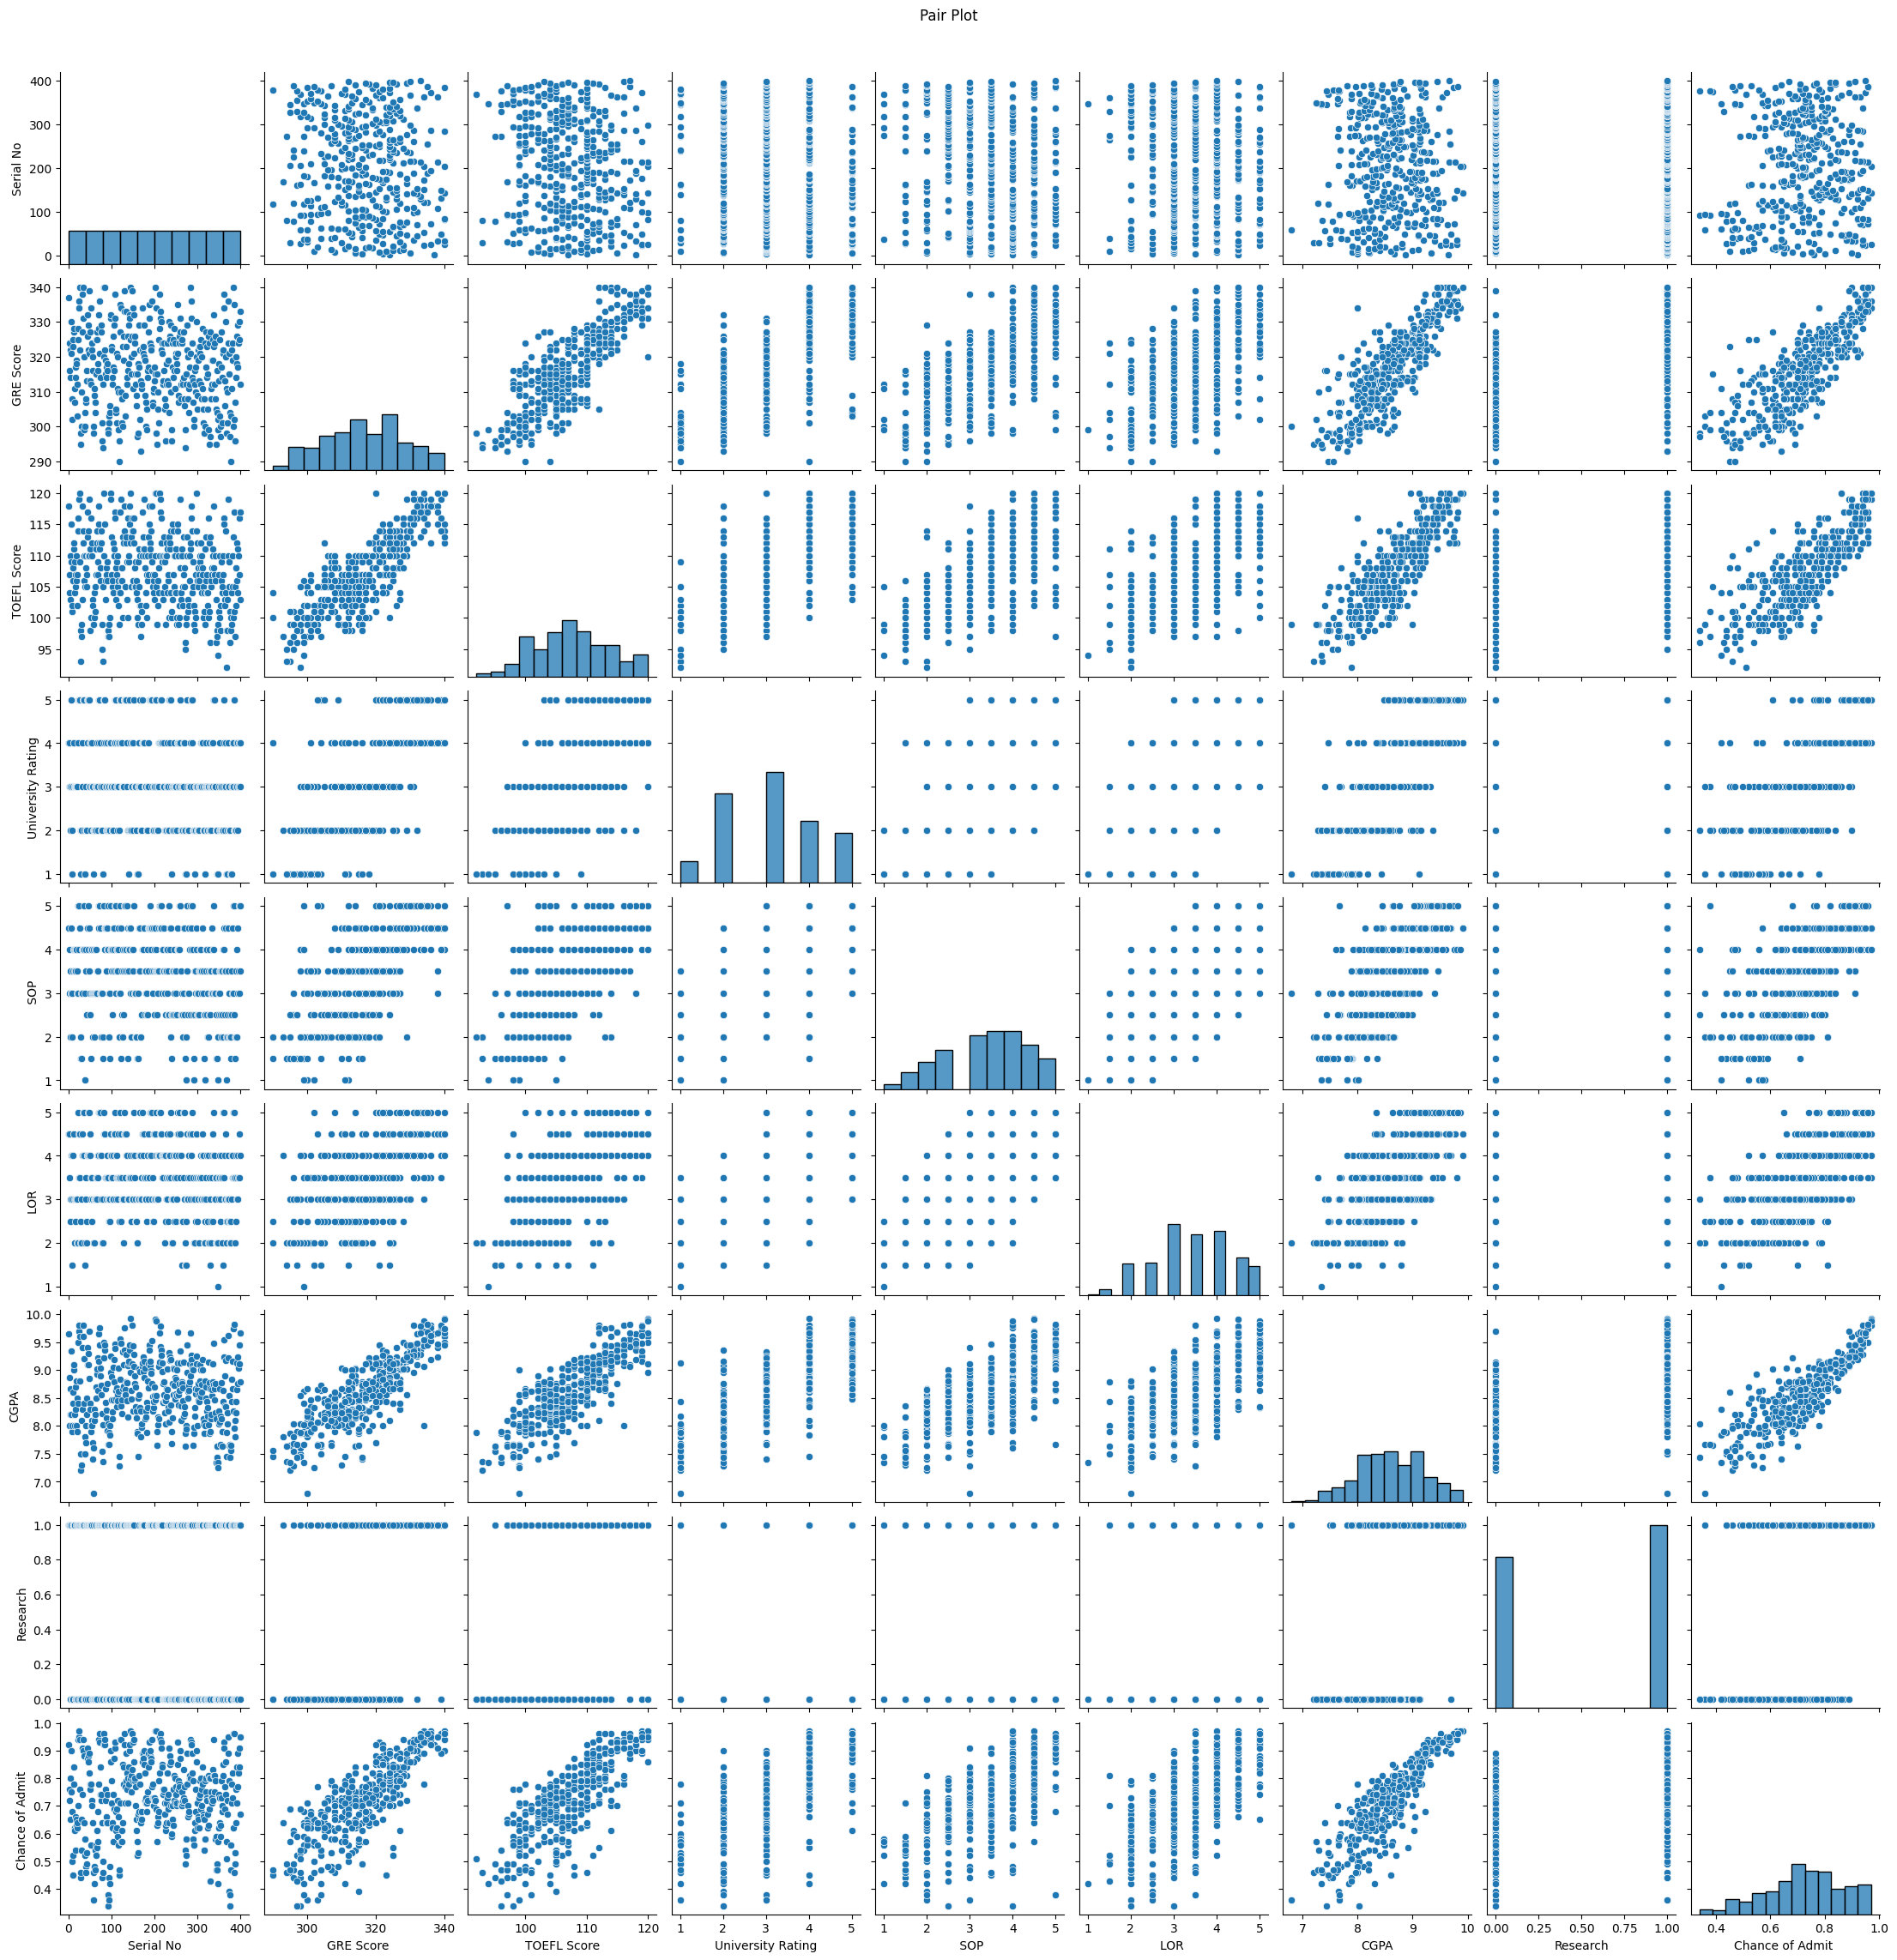

In [12]:
# Correlation Metrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#Histogram
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

#pair Plot
sns.pairplot(df)
plt.suptitle('Pair Plot', y=1.02)
plt.show()


## **Data Preprocessing**

In [14]:
# Convert Categorical Variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
features = df.drop(['Chance of Admit '], axis=1)
target = df['Chance of Admit ']
features_scaled = scaler.fit_transform(features)

## **Define Target Variable (y) and Feature Variables (X)**

In [19]:
# Define the target variable 'y' (Chance of Admit)
y = df['Chance of Admit ']

# Define the feature variables 'X' (all columns except Chance of Admit)
X = df.drop(['Chance of Admit ', 'Serial No'], axis=1)  # Exclude 'Serial No' as it's not a useful feature

## **Train Test Split**

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


## **Modeling**

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **Model Evaluation and prediction**

In [22]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.004616592264723966
R-squared: 0.8212241793299224


## **Explaination**

Sure, I'll break down the explanation of this project into simpler terms:

### Project Explanation: Predicting Chances of Admission

#### Objective
The goal of this project is to predict the chances of a student being admitted to a university based on various factors like GRE scores, TOEFL scores, university rating, statement of purpose (SOP), letters of recommendation (LOR), CGPA, and research experience.

#### Steps Involved

1. **Loading the Data**
    - We start by loading the data from a CSV file into a DataFrame using the `pandas` library.
    - This dataset contains information about students' admission criteria and their corresponding chances of getting admitted.

2. **Exploring the Data**
    - We display the first few rows of the dataset to understand its structure.
    - We check for any missing values and drop them if found.
    - We also remove any duplicate entries.

3. **Visualizing the Data**
    - We use various plots to understand the data better:
      - **Correlation Matrix**: Shows the relationship between different variables.
      - **Histograms**: Displays the distribution of each variable.
      - **Pair Plot**: Displays scatter plots for each pair of variables.
      - **Box Plots**: Shows the distribution of categorical features like university rating, SOP, LOR, and research.
      - **Count Plot**: Displays the count of students with and without research experience.
      - **Scatter Plots**: Shows the relationship between key features (GRE, TOEFL, CGPA) and the chance of admission.

4. **Preparing the Data**
    - We define `y` as the target variable, which is the "Chance of Admit".
    - We define `X` as the feature variables, which include all the other columns except "Chance of Admit" and "Serial No".

5. **Scaling the Features**
    - We use `StandardScaler` to scale the feature variables so that they have a mean of 0 and a standard deviation of 1. This helps improve the performance of the machine learning model.

6. **Splitting the Data**
    - We split the data into a training set and a test set using `train_test_split`. The training set is used to train the model, and the test set is used to evaluate its performance.

7. **Training the Model**
    - We use a linear regression model to predict the chances of admission. Linear regression finds the best-fit line that predicts the target variable (chance of admission) based on the feature variables.

8. **Making Predictions**
    - We use the trained model to make predictions on the test set.

9. **Evaluating the Model**
    - We evaluate the model's performance using two metrics:
      - **Mean Squared Error (MSE)**: Measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit.
      - **R-squared (R2)**: Represents the proportion of the variance in the target variable that can be explained by the feature variables. A higher R2 indicates a better fit.

### Summary
By following these steps, we can build a predictive model that estimates a student's chances of getting admitted to a university based on their GRE scores, TOEFL scores, university rating, SOP, LOR, CGPA, and research experience. The visualization steps help us understand the data better, and the evaluation metrics help us assess the model's performance.

If you have any specific questions or need further clarification on any part of the project, feel free to ask!